In [10]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from kneed import KneeLocator
from scipy.interpolate import interp1d
import numpy as np

main_path = '/gpfs/data/pmedlab/Users/mottej02/dl_project/pipeline/Histomorphological-Phenotype-Learning'
sys.path.append(main_path)

### BARLOW TWINS ###

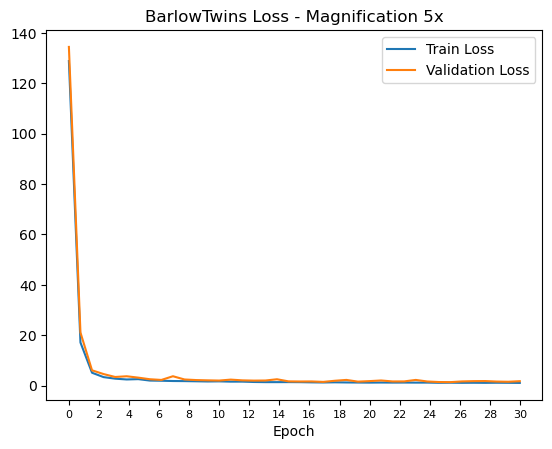


Train loss for nearby epochs:
Epoch 14: 1.6636
Epoch 15: 1.4465
Epoch 16: 1.5244
Epoch 17: 1.4473
Epoch 18: 1.3157
Epoch 19: 1.4934
Epoch 20: 1.2552
Epoch 21: 1.2723
Epoch 22: 1.2680
Epoch 23: 1.3142
Epoch 24: 1.1647
Epoch 25: 1.2280
Epoch 26: 1.2180
Epoch 27: 1.2104
Epoch 28: 1.0608
Epoch 29: 1.2174
Epoch 30: 1.1608

Validation loss for nearby epochs:
Epoch 14: 1.8745
Epoch 15: 2.2176
Epoch 16: 2.3351
Epoch 17: 2.2113
Epoch 18: 1.9787
Epoch 19: 2.4583
Epoch 20: 1.7499
Epoch 21: 1.7965
Epoch 22: 1.6323
Epoch 23: 1.4662
Epoch 24: 1.5169
Epoch 25: 1.9319
Epoch 26: 3.3605
Epoch 27: 1.4839
Epoch 28: 1.7004
Epoch 29: 1.9623
Epoch 30: 1.7715


In [4]:
mag = '5x'
dataset = f'TCGAFFPE_LUADLUSC_{mag}_60pc_250K'

loss = pd.read_csv(f'{main_path}/data_model_output/BarlowTwins_3/{dataset}/h224_w224_n3_zdim128/loss.csv')

x = loss['Iteration']

y_train = loss['Redundancy Reduction Loss Train']
y_valid = loss['Redundancy Reduction Loss Validation']

cubic_interpolation_model_train = interp1d(x, y_train, kind = "cubic")
cubic_interpolation_model_valid = interp1d(x, y_valid, kind = "cubic")

X = np.linspace(x.min(), x.max(), 40)
Y_train = cubic_interpolation_model_train(X) 
Y_valid = cubic_interpolation_model_valid(X)


plt.plot(X, Y_train, label='Train Loss')
plt.plot(X, Y_valid, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')


iter_lst = []
i_lst=range(31)
for i in i_lst:
    iter = i*round((loss['Iteration'][loss.shape[0]-1]/30)/10)*10+10
    iter_lst.append(iter)

del iter_lst[1::2]
epoch_lst = list(map(str, np.arange(31)))
del epoch_lst[1::2]     
plt.xticks(iter_lst, epoch_lst, size=8)


plt.title(f'BarlowTwins Loss - Magnification {mag}')
plt.xlabel('Epoch')
plt.savefig(f'{main_path}/data_model_output/BarlowTwins_3/{dataset}/h224_w224_n3_zdim128/{dataset}_barlowtwins_loss_replication.jpg', dpi=300, bbox_inches="tight")
plt.show()


#Print a small table showing nearby epochs for comparison
print("\nTrain loss for nearby epochs:")
for epoch in range(14, 31):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['Redundancy Reduction Loss Train'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")


#Table showing nearby epochs for comparison
print("\nValidation loss for nearby epochs:")
for epoch in range(14, 31):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['Redundancy Reduction Loss Validation'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")


### VICReg: Model 0 ###

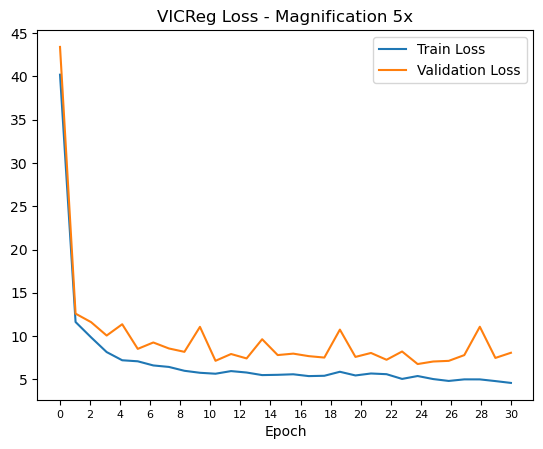


Train loss for nearby epochs:
Epoch 20: 5.3168
Epoch 21: 5.3108
Epoch 22: 5.7486
Epoch 23: 5.3342
Epoch 24: 5.1583
Epoch 25: 5.2273

Validation loss for nearby epochs:
Epoch 20: 6.5785
Epoch 21: 8.1615
Epoch 22: 7.9466
Epoch 23: 7.1443
Epoch 24: 6.9145
Epoch 25: 7.4020


In [12]:
mag = '5x'
dataset = f'TCGAFFPE_LUADLUSC_{mag}_60pc_250K'

num = '0'
model = f'VICReg_{num}'

loss = pd.read_csv(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/loss.csv')

x = loss['Iteration']

y_train = loss['VICReg Loss Train']
y_valid = loss['VICReg Loss Validation']

cubic_interpolation_model_train = interp1d(x, y_train, kind = "cubic")
cubic_interpolation_model_valid = interp1d(x, y_valid, kind = "cubic")

X = np.linspace(x.min(), x.max(), 30)
Y_train = cubic_interpolation_model_train(X) 
Y_valid = cubic_interpolation_model_valid(X)


plt.plot(X, Y_train, label='Train Loss')
plt.plot(X, Y_valid, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')


iter_lst = []
i_lst=range(31)
for i in i_lst:
    iter = i*round((loss['Iteration'][loss.shape[0]-1]/30)/10)*10+10
    iter_lst.append(iter)

del iter_lst[1::2]
epoch_lst = list(map(str, np.arange(31)))
del epoch_lst[1::2]     
plt.xticks(iter_lst, epoch_lst, size=8)


plt.title(f'VICReg Loss - Magnification {mag}')
plt.xlabel('Epoch')
plt.savefig(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/{dataset}_{model}_loss_replication.jpg', dpi=300, bbox_inches="tight")
plt.show()


#Table showing nearby epochs for comparison
print("\nTrain loss for nearby epochs:")
for epoch in range(20, 26):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['VICReg Loss Train'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")


#Table showing nearby epochs for comparison
print("\nValidation loss for nearby epochs:")
for epoch in range(20, 26):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['VICReg Loss Validation'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")

### VICReg: Model 2 ###

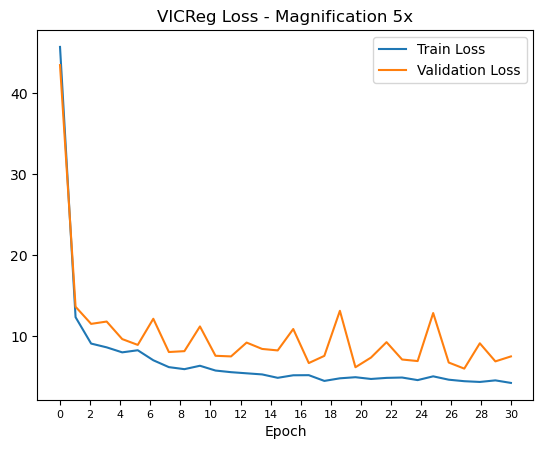

In [8]:
mag = '5x'
dataset = f'TCGAFFPE_LUADLUSC_{mag}_60pc_250K'

num = '2'
model = f'VICReg_{num}'

loss = pd.read_csv(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/loss.csv')

x = loss['Iteration']

y_train = loss['VICReg Loss Train']
y_valid = loss['VICReg Loss Validation']

cubic_interpolation_model_train = interp1d(x, y_train, kind = "cubic")
cubic_interpolation_model_valid = interp1d(x, y_valid, kind = "cubic")

X = np.linspace(x.min(), x.max(), 30)
Y_train = cubic_interpolation_model_train(X) 
Y_valid = cubic_interpolation_model_valid(X)


plt.plot(X, Y_train, label='Train Loss')
plt.plot(X, Y_valid, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')


iter_lst = []
i_lst=range(31)
for i in i_lst:
    iter = i*round((loss['Iteration'][loss.shape[0]-1]/30)/10)*10+10
    iter_lst.append(iter)

del iter_lst[1::2]
epoch_lst = list(map(str, np.arange(31)))
del epoch_lst[1::2]     
plt.xticks(iter_lst, epoch_lst, size=8)


plt.title(f'VICReg Loss - Magnification {mag}')
plt.xlabel('Epoch')
plt.savefig(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/{dataset}_{model}_loss_replication.jpg', dpi=300, bbox_inches="tight")
plt.show()


### VICReg: Model 5 ###

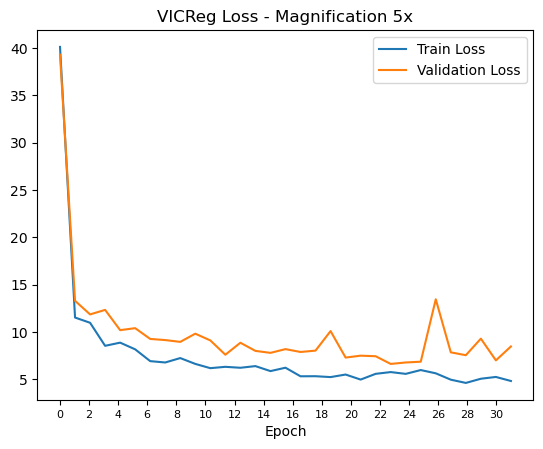


Train loss for nearby epochs:
Epoch 20: 5.4392
Epoch 21: 5.6430
Epoch 22: 5.7457
Epoch 23: 5.4766
Epoch 24: 5.8539
Epoch 25: 5.9256

Validation loss for nearby epochs:
Epoch 20: 6.7049
Epoch 21: 6.8851
Epoch 22: 7.5618
Epoch 23: 6.7978
Epoch 24: 6.9247
Epoch 25: 6.7327


In [6]:
mag = '5x'
dataset = f'TCGAFFPE_LUADLUSC_{mag}_60pc_250K'

num = '5'
model = f'VICReg_{num}'

loss = pd.read_csv(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/loss.csv')

x = loss['Iteration']

y_train = loss['VICReg Loss Train']
y_valid = loss['VICReg Loss Validation']

cubic_interpolation_model_train = interp1d(x, y_train, kind = "cubic")
cubic_interpolation_model_valid = interp1d(x, y_valid, kind = "cubic")

X = np.linspace(x.min(), x.max(), 31)
Y_train = cubic_interpolation_model_train(X) 
Y_valid = cubic_interpolation_model_valid(X)


plt.plot(X, Y_train, label='Train Loss')
plt.plot(X, Y_valid, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')

iter_lst = []
i_lst=range(31)
for i in i_lst:
    iter = i*round((loss['Iteration'][loss.shape[0]-1]/31)/10)*10+10
    iter_lst.append(iter)

del iter_lst[1::2]
epoch_lst = list(map(str, np.arange(31)))
del epoch_lst[1::2]     
plt.xticks(iter_lst, epoch_lst, size=8)


plt.title(f'VICReg Loss - Magnification {mag}')
plt.xlabel('Epoch')
plt.savefig(f'{main_path}/data_model_output/{model}/{dataset}/h224_w224_n3_zdim128/{dataset}_{model}_loss_replication.jpg', dpi=300, bbox_inches="tight")
plt.show()


#Table showing nearby epochs for comparison
print("\nTrain loss for nearby epochs:")
for epoch in range(20, 26):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['VICReg Loss Train'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")

#Table showing nearby epochs for comparison
print("\nValidation loss for nearby epochs:")
for epoch in range(20, 26):
    epoch_row = loss[loss['Epoch'] == epoch]
    if not epoch_row.empty:
        val_loss = epoch_row['VICReg Loss Validation'].values[0]
        print(f"Epoch {epoch}: {val_loss:.4f}")